Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

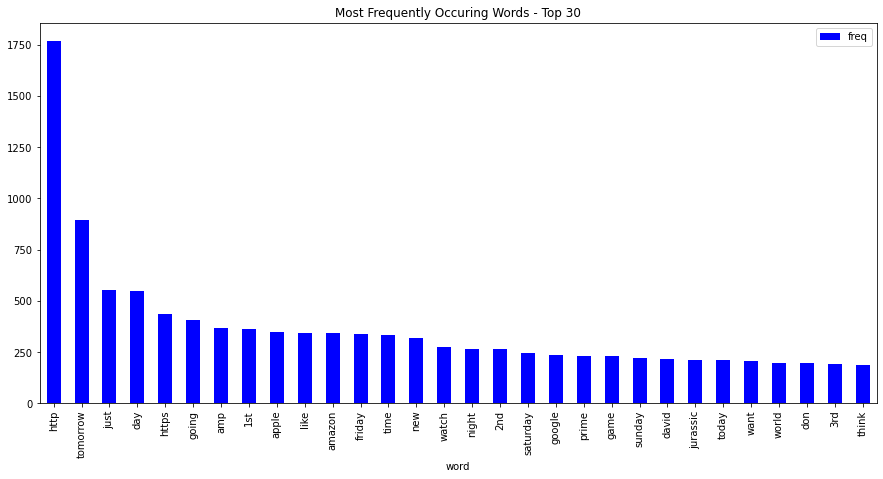

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

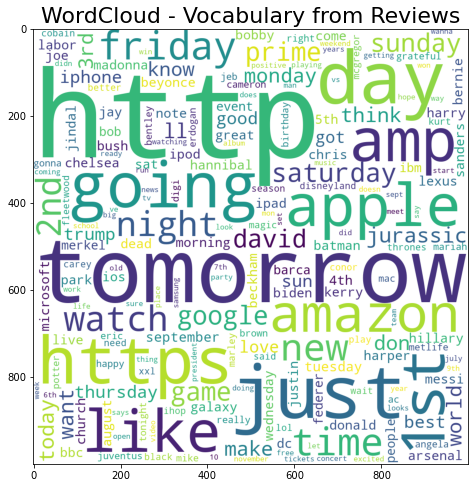

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [15]:
import os
import random
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
from matplotlib import rcParams
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.isri import ISRIStemmer
from collections import Counter 
import itertools
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from joblib import dump, load

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# data import 

In [16]:
import pandas as pd

df = pd.read_table('./data/twitter-2016train-A.txt' , usecols=[0,1,2], encoding='utf-8', names=['id','sentiment', 'tweet'])
#dataTest = pd.read_table('../input/semevalll/SemEval2017-test.txt', usecols=[1,2], encoding='utf-8', names=['sentiment', 'tweet'])                   
#combine = [dataTrain,dataTest]
df

,id,sentiment,tweet
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...
1,628976607420645377,negative,@Microsoft how about you make a system that do...
2,629023169169518592,negative,I may be ignorant on this issue but... should ...
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ..."
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...
...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...


# add label

In [17]:
CATEGORY_INDEX = {
    "negative": -1,
    "neutral": 0,
    "positive": 1
}

"""import data """
raw_label = df['sentiment'].values.tolist()
rawlabel = []
for i in range(len(raw_label)):
    rawlabel.append(CATEGORY_INDEX[raw_label[i]])
rawlabel

[-1,
 -1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 -1,
 -1,
 -1,
 0,
 0,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 -1,
 -1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 -1,
 0

In [18]:
df['label'] = rawlabel
df

,id,sentiment,tweet,label
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...,-1
1,628976607420645377,negative,@Microsoft how about you make a system that do...,-1
2,629023169169518592,negative,I may be ignorant on this issue but... should ...,-1
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ...",-1
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...,0
...,...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...,1


In [19]:
df_back = df.copy()
df_back

,id,sentiment,tweet,label
0,628949369883000832,negative,dear @Microsoft the newOoffice for Mac is grea...,-1
1,628976607420645377,negative,@Microsoft how about you make a system that do...,-1
2,629023169169518592,negative,I may be ignorant on this issue but... should ...,-1
3,629179223232479232,negative,"Thanks to @microsoft, I just may be switching ...",-1
4,629186282179153920,neutral,If I make a game as a #windows10 Universal App...,0
...,...,...,...,...
5863,639855845958885376,positive,@Racalto_SK ok good to know. Punting at MetLif...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...,1


# data preprocessing

## 1 data cleansing 

In [20]:
df = df.dropna()

In [21]:
def clean_base(tweets, clean_object):
        #tweets.loc[:, "tweet"].replace(clean_object, "", inplace=True)
        tweets = re.sub(clean_object, ' ', tweets)
        return tweets

In [22]:
def remove_urls(tweets):
        return clean_base(tweets, re.compile(r"http.?://[^\s]+[\s]?"))

In [23]:
def remove_usernames(tweets):
        return clean_base(tweets, re.compile(r"@[^\s]+[\s]?"))

In [24]:
def remove_hashtags(tweets):  # it unrolls the hashtags to normal words
        for hashtag in map(lambda x: re.compile(re.escape(x)), [",", ":", "\"", "=", "&", ";", "%", "$",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "#"]):
            tweets = re.sub(hashtag, ' ', tweets)
        return tweets

In [25]:
def remove_numbers(tweets):
        return clean_base(tweets, re.compile(r"\s?[0-9]+\.?[0-9]*"))

In [26]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [128]:
##############################################

In [28]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [29]:
###############################################################

In [30]:
def processDocument(doc, stemmer): 

    #Replace @username with empty string
    doc = remove_usernames(doc)
    #Replace url with empty string
    doc = remove_urls(doc)

    
    #doc = re.sub(r'@[^\s]+', ' ', doc)
    #doc = re.sub(r'_', ' ', doc)
    
    
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('(www\.[^\s])',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    
    # remove punctuations
    doc= remove_punctuations(doc)
    # normalize the tweet
    #doc= normalize_arabic(doc)
    
    #Replace numbers with empty string
    doc = remove_numbers(doc)
    #Replace @username with empty string
    doc = remove_hashtags(doc)
    # remove repeated letters
    #doc=remove_repeating_char(doc)
    
    #stemming
    doc = stemmer.stem(doc)
   
    return doc



stemmer = ISRIStemmer()
df["tweet"] = df['tweet'].apply(lambda x: processDocument(x, stemmer))
df

,id,sentiment,tweet,label
0,628949369883000832,negative,dear the newOoffice for Mac is great and all ...,-1
1,628976607420645377,negative,how about you make a system that doesnt eat m...,-1
2,629023169169518592,negative,I may be ignorant on this issue but should we ...,-1
3,629179223232479232,negative,Thanks to I just may be switching over to,-1
4,629186282179153920,neutral,If I make a game as a windows Universal App Wi...,0
...,...,...,...,...
5863,639855845958885376,positive,ok good to know Punting at MetLife in Decembe...,1
5864,639979760735662080,neutral,everyone who sat around me at metlife was so a...,0
5865,640196838260363269,neutral,what giants or niners fans would wanna go to t...,0
5866,640975710354567168,positive,Anybody want a ticket for tomorrow Colombia vs...,1


In [98]:
#df.to_csv('./data.csv')

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\luche\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [33]:
########################################trail 1#######################################################

In [34]:
data = []

# Separating our features (text) and our labels into two lists to smoothen our work
X = df['tweet'].tolist()
Y = df['label'].tolist()

# Building our data list, that is a list of tuples, where each tuple is a pair of the tokenized text
# and its corresponding label
for x, y in zip(X, Y):
    
    data.append((nltk.word_tokenize(x), y))
    
# Printing the CPU time and the first 5 elements of our 'data' list
#print('CPU Time:', time() - start_time)
data[:5]

[(['dear',
   'the',
   'newOoffice',
   'for',
   'Mac',
   'is',
   'great',
   'and',
   'all',
   'but',
   'no',
   'Lync',
   'update',
   'Cmon'],
  -1),
 (['how',
   'about',
   'you',
   'make',
   'a',
   'system',
   'that',
   'doesnt',
   'eat',
   'my',
   'friggin',
   'discs',
   'This',
   'is',
   'the',
   'nd',
   'time',
   'this',
   'has',
   'happened',
   'and',
   'I',
   'am',
   'so',
   'sick',
   'of',
   'it'],
  -1),
 (['I',
   'may',
   'be',
   'ignorant',
   'on',
   'this',
   'issue',
   'but',
   'should',
   'we',
   'celebrate',
   'parental',
   'leave',
   'changes',
   'Doesnt',
   'the',
   'gender',
   'divide',
   'suggest'],
  -1),
 (['Thanks', 'to', 'I', 'just', 'may', 'be', 'switching', 'over', 'to'], -1),
 (['If',
   'I',
   'make',
   'a',
   'game',
   'as',
   'a',
   'windows',
   'Universal',
   'App',
   'Will',
   'xboxone',
   'owners',
   'be',
   'able',
   'to',
   'download',
   'and',
   'play',
   'it',
   'in',
   'Novemb

In [35]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from time import time

In [36]:
pos_tag(data[0][0])

[('dear', 'IN'),
 ('the', 'DT'),
 ('newOoffice', 'NN'),
 ('for', 'IN'),
 ('Mac', 'NNP'),
 ('is', 'VBZ'),
 ('great', 'JJ'),
 ('and', 'CC'),
 ('all', 'DT'),
 ('but', 'CC'),
 ('no', 'DT'),
 ('Lync', 'NNP'),
 ('update', 'NN'),
 ('Cmon', 'NNP')]

In [38]:
STOP_WORDS = stopwords.words('english')
def lemmatize_sentence(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Eliminating the token if it is a link
        
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token.lower(), pos)

        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if token not in string.punctuation and len(token) > 2 and token not in STOP_WORDS:
            cleaned_tokens.append(token)
            
    return cleaned_tokens
# Prevewing the remove_noise() output
print(lemmatize_sentence(data[0][0]))

['dear', 'newooffice', 'mac', 'great', 'lync', 'update', 'cmon']


In [39]:
start_time = time()

# As the Naive Bayesian classifier accepts inputs in a dict-like structure,
# we have to define a function that transforms our data into the required input structure
def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

# Removing noise from all the data
for tokens, label in data:
    cleaned_tokens_list.append((lemmatize_sentence(tokens), label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

final_data = []

# Transforming the data to fit the input structure of the Naive Bayesian classifier
for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))
    
print('Data Prepared for model, CPU Time:', time() - start_time)

# Previewing our final (tokenized, cleaned and lemmatized) data list
final_data[:5]

Removed Noise, CPU Time: 6.654738187789917
Data Prepared for model, CPU Time: 0.015793800354003906


[({'dear': True,
   'newooffice': True,
   'mac': True,
   'great': True,
   'lync': True,
   'update': True,
   'cmon': True},
  -1),
 ({'make': True,
   'system': True,
   'doesnt': True,
   'eat': True,
   'friggin': True,
   'disc': True,
   'time': True,
   'happen': True,
   'sick': True},
  -1),
 ({'may': True,
   'ignorant': True,
   'issue': True,
   'celebrate': True,
   'parental': True,
   'leave': True,
   'change': True,
   'doesnt': True,
   'gender': True,
   'divide': True,
   'suggest': True},
  -1),
 ({'thanks': True, 'may': True, 'switch': True}, -1),
 ({'make': True,
   'game': True,
   'window': True,
   'universal': True,
   'app': True,
   'xboxone': True,
   'owner': True,
   'able': True,
   'download': True,
   'play': True,
   'november': True},
  0)]

Positive words


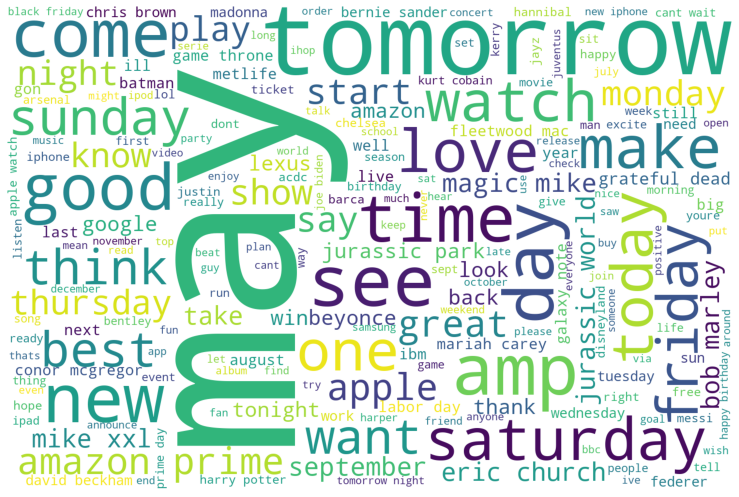

Negative words


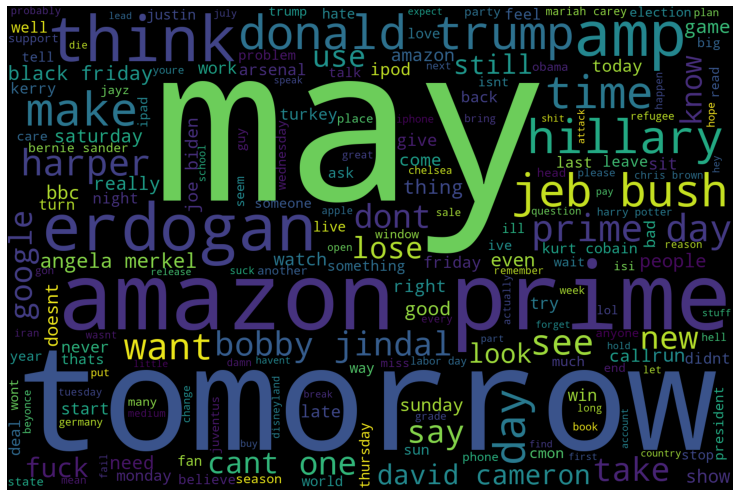

Neutral words


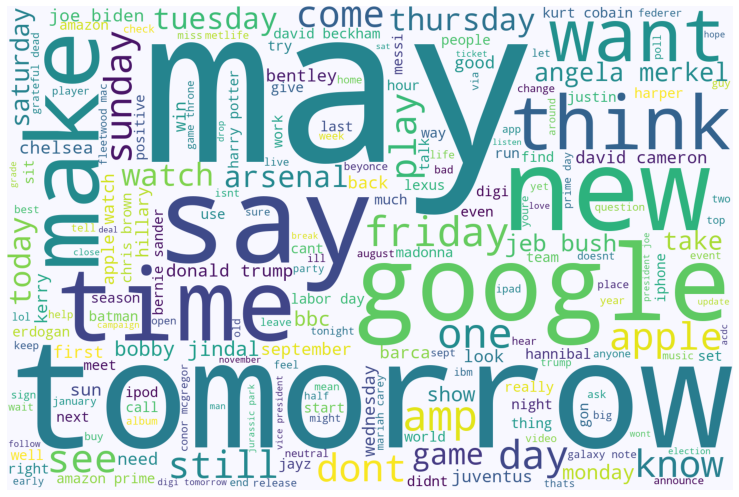

CPU Time: 7.985503196716309


In [42]:
start_time = time()

from wordcloud import WordCloud, STOPWORDS

positive_words = []
negative_words = []
neutral_words = []

# Separating out positive and negative words (i.e., words appearing in negative and positive tweets),
# in order to visualize each set of words seperately
for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    elif cleaned_tokens_list[i][1] == -1:
        negative_words.extend(cleaned_tokens_list[i][0])
    elif cleaned_tokens_list[i][1] == 0:
        neutral_words.extend(cleaned_tokens_list[i][0])

# Defining our word cloud drawing function
def wordcloud_draw(data, color = 'black',title = 'positive'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 1500,
                          height = 1000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    #plt.savefig('./data/cloud_%s.jpg'%title)
    plt.show()
    
print("Positive words")
wordcloud_draw(positive_words, 'white',title = 'positive')
print("Negative words")
wordcloud_draw(negative_words,title = 'nagative')        
print("Neutral words")
wordcloud_draw(neutral_words,'ghostwhite',title = 'neutral') 

print('CPU Time:', time() - start_time)

In [201]:
# As our data is currently ordered by label, we have to shuffle it before splitting it
# .Random(140) randomizes our data with seed = 140. This guarantees the same shuffling for every execution of our code
# Feel free to alter this value or even omit it to have different outputs for each code execution
random.Random(22).shuffle(final_data)

# Here we decided to split our data as 90% train data and 10% test data
# Once again, feel free to alter this number and test the model accuracy
trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

In [3]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=391f91a729a85ce9c522427fc7787e8a1fd440d551959216bed8e66a7d4f66ec
  Stored in directory: c:\users\luche\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [5]:
import wget
url = 'http://nlp.stanford.edu/data/glove.6B.zip'
myfile = wget.download(url)

100% [......................................................................] 862182613 / 862182613

In [43]:
import numpy as np

In [44]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [45]:
# Loading the 50-dimensional GloVe embeddings
# This method will return three dictionaries:
# * word_to_index: a dictionary mapping from words to their indices in the vocabulary
# * index_to_word: dictionary mapping from indices to their corresponding words in the vocabulary
# * word_to_vec_map: dictionary mapping words to their GloVe vector representation
# Note that there are 400,001 words, with the valid indices ranging from 0 to 400,000

word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [46]:
def cosine_similarity(u, v):
    dot = np.dot(u, v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    cosine_similarity = dot / (norm_u * norm_v)
    return cosine_similarity

In [71]:
start_time = time()

unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index


# Here we will utilize the already computed 'cleaned_tokens_list' variable
   
print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)

X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))

for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:100])
print(Y[:100])

Removed Noise, CPU Time: 0.0009970664978027344
max_len: 536
Data Prepared for model, CPU Time: 0.07584857940673828
[[118309. 372306. 229153. ...      0.      0.      0.]
 [231458. 350362. 126852. ...      0.      0.      0.]
 [237383. 186885. 193637. ...      0.      0.      0.]
 ...
 [227517. 169725. 174666. ...      0.      0.      0.]
 [278611. 366910. 188929. ...      0.      0.      0.]
 [237383. 329448. 248238. ...      0.      0.      0.]]
[-1. -1. -1. -1.  0.  1. -1. -1.  1. -1.  1. -1. -1.  0.  1.  0.  0. -1.
 -1.  1.  1. -1.  1. -1.  1.  1.  0. -1. -1. -1.  0.  0. -1. -1. -1. -1.
 -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  0. -1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  0.  1.  0. -1. -1.  1.  0.
  0.  1.  1.  1.  0.  1. -1.  1.  0. -1.  1. -1.  1. -1.  1. -1.  1. -1.
 -1.  1. -1.  1.  1.  0.  1. -1.  1.  1.]


In [105]:
import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional,Activation
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [53]:
my_seed = 24
np.random.seed(my_seed)

In [54]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len):
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["unk"].shape[0] #50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False, input_shape=(max_len,))
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [111]:
# Defining a sequencial model composed of firstly the embedding layer, than a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates our desired output betwene 0 and 1.

model = Sequential()

model.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(rate=0.4))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(rate=0.4))
#model.add(Dense(units=1, activation='sigmoid'))
model.add(Dense(units=64,kernel_initializer="uniform",activation='tanh'))        
model.add(Dense(units=3,kernel_initializer="uniform",activation='sigmoid'))




model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 536, 50)           20000050  
_________________________________________________________________
lstm_27 (LSTM)               (None, 536, 64)           29440     
_________________________________________________________________
dropout_16 (Dropout)         (None, 536, 64)           0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 3)               

In [112]:
optimizer =tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [116]:
Y_train

array([ 0.,  0.,  0., ...,  1.,  1., -1.])

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=22, stratify=Y)

In [114]:
filepath='./data/weights.best.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath= filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
earlyStop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, mode='min', verbose=1, restore_best_weights = True)
callbacks_list = [checkpoint]

In [115]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 200, batch_size = 256, shuffle=True,callbacks=callbacks_list)

Epoch 1/200


ValueError: in user code:

    C:\Users\luche\.conda\envs\aml\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\luche\.conda\envs\aml\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\luche\.conda\envs\aml\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\luche\.conda\envs\aml\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\luche\.conda\envs\aml\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [ ]:
model.save('./lstm-4-7.h5')

In [ ]:
def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
plot_acc_loss(model.history)